In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [41]:
path = "Logs/Log_43/" # random:20, 14, sort 100:18, sort 50:17
n = 50000
file = open(path + 'Node_Log.txt', 'r')

line = file.readline()
Node = [i for i in range(n)]
Region = [0 for i in range(n)]
Time = [0 for i in range(n)]
Height = [0 for i in range(n)]
links = [0 for i in range(n)]
while line:
    node = int(line.split()[0])
    time = (int(line.split()[1]))
    region = (int(line.split()[2]))
    h = int(line.split()[3])
    l = int(line.split()[4])
    Region[node] = region
    Time[node] = time
    Height[node] = h
    links[node] = l
    line = file.readline()

In [42]:
file = open(path + 'Agent_Log.txt', 'r')

line = file.readline()
is_Agent = [False for i in range(n)]
Subset = [0 for i in range(n)]
while line:
    node = int(line.split()[0])
    subset = int(line.split()[2])
    is_Agent[node] = True
    Subset[node] = subset
    line = file.readline()

In [43]:
file = open(path + 'Source_Msg_Log.txt', 'r')

line = file.readline()
tree_edges = [[] for i in range(n)]
sender_set = set()
root = None
while line:
    sender = int(line.split()[4])
    receiver = int(line.split()[6])
    sender_set.add(sender)
    if sender == receiver:
        root = sender
        line = file.readline()
        continue
    tree_edges[sender].append(receiver)
    line = file.readline()

Leaves = [len(tree_edges[i]) for i in range(n)]

In [44]:
Data = pd.DataFrame(data={'Node_id':Node, "Receipt_time":Time, "Height":Height, "Region_id":Region, 
                          "is_Agent":is_Agent, "Agent_subset":Subset, "Leaves":Leaves, 
                          "Links": links, "Leaves_list":tree_edges})

In [45]:
Data['is_Leave'] = np.where(Data['Leaves']>0, 0, 1)
Data.sort_values('Receipt_time')

,Node_id,Receipt_time,Height,Region_id,is_Agent,Agent_subset,Leaves,Links,Leaves_list,is_Leave
6258,6258,0,0,5,True,1,6,6,"[47332, 20107, 35938, 7023, 15982, 46631]",0
47332,47332,11546,1,5,True,1,7,8,"[15019, 18001, 22807, 40396, 22619, 47994, 45064]",0
20107,20107,18212,1,5,True,1,10,11,"[10330, 15352, 46692, 16481, 26079, 31024, 433...",0
35938,35938,29747,1,11,True,1,6,8,"[17025, 42, 29368, 2157, 47441, 42192]",0
15019,15019,34627,2,11,True,1,4,6,"[32598, 15937, 37476, 42290]",0
...,...,...,...,...,...,...,...,...,...,...
49388,49388,399617,11,15,False,0,0,4,[],1
46795,46795,401940,10,15,False,0,0,4,[],1
47812,47812,406476,11,15,False,0,0,4,[],1
45589,45589,407315,14,15,False,0,0,4,[],1


In [40]:
Data_region = Data.groupby(['Region_id']).mean()
Data_region

,Node_id,Receipt_time,Height,is_Agent,Agent_subset,Leaves,Links,is_Leave
Region_id,,,,,,,,
0,27597.953540,95267.208794,5.243086,0.790929,0.858131,0.918971,8.983131,0.581305
1,24637.614714,113618.113262,6.047435,0.956438,1.092288,1.818006,9.619555,0.287512
2,25313.315742,176411.965423,9.287534,0.911435,1.090385,0.767364,7.680922,0.556870
3,25030.830010,128618.356326,6.854855,0.879699,0.933638,0.693364,7.454397,0.600850
4,24724.682656,150725.769695,7.743964,0.860864,0.966328,0.635642,6.775413,0.607052
5,24600.900168,250862.023451,12.666667,0.769514,1.281407,1.333333,8.802680,0.443886
6,24741.454487,92678.857327,5.086830,0.937702,1.001614,1.453196,6.757263,0.401227
7,24883.992815,157167.088410,8.108716,0.924399,1.189628,0.843174,8.909403,0.506717
8,24917.914934,130428.048609,6.905341,0.942437,1.101695,1.257115,8.515830,0.373201


In [10]:
leaves_overtime = np.array(Data.groupby(pd.cut(Data['Receipt_time'],np.arange(0, 70000, 1000)))['is_Leave'].sum())
leaves_overtime_cum = np.cumsum(leaves_overtime)

In [11]:
import matplotlib
font = {'size'   : 18}

matplotlib.rc('font', **font)

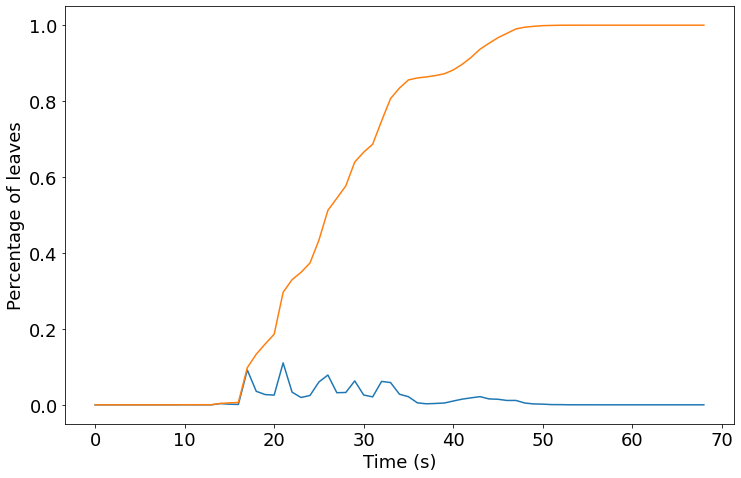

In [12]:
fig = plt.figure(figsize=(12,8))
#fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
#ax.set_title('axes title')

ax.set_xlabel('Time (s)')
ax.set_ylabel('Percentage of leaves')
ax.plot(leaves_overtime/sum(leaves_overtime))
ax.plot(np.array(leaves_overtime_cum)/sum(leaves_overtime))

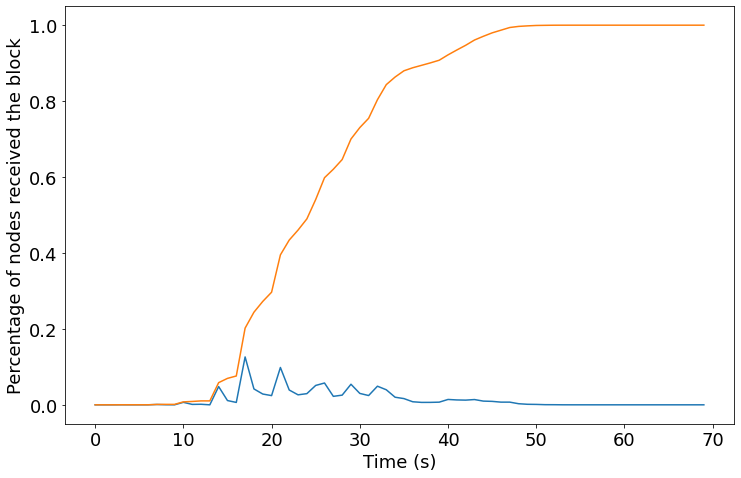

In [13]:
block_overtime = np.array(Data.groupby(pd.cut(Data['Receipt_time'],np.arange(-1,70000,1000)))['Node_id'].count())
block_overtime_cum = np.cumsum(block_overtime)

fig = plt.figure(figsize=(12,8))
#fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
#ax.set_title('axes title')

ax.set_xlabel('Time (s)')
ax.set_ylabel('Percentage of nodes received the block')
ax.plot(block_overtime/sum(block_overtime))
ax.plot(np.array(block_overtime_cum)/sum(block_overtime))

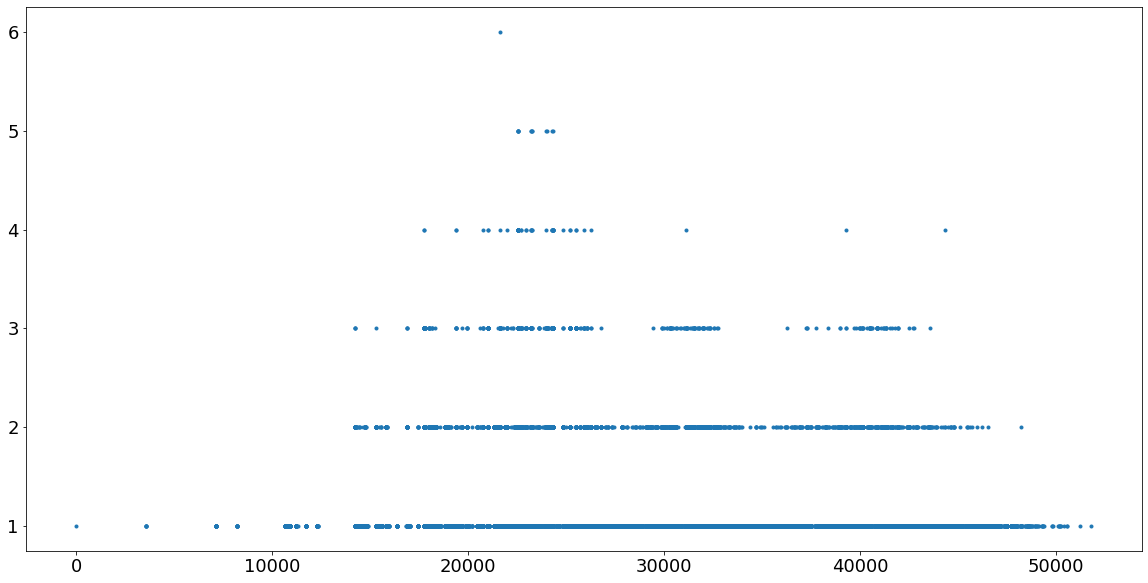

In [14]:
Data_agent = Data[Data['is_Agent'] == True]
plt.figure(figsize=(20,10))
plt.plot(Data_agent['Receipt_time'], Data_agent['Agent_subset'], '.')

In [15]:
len(Data_agent)

44829

In [16]:
x = Data_agent[Data_agent['Agent_subset'] != 0]['Agent_subset'].values
x

array([1, 1, 1, ..., 1, 2, 1])

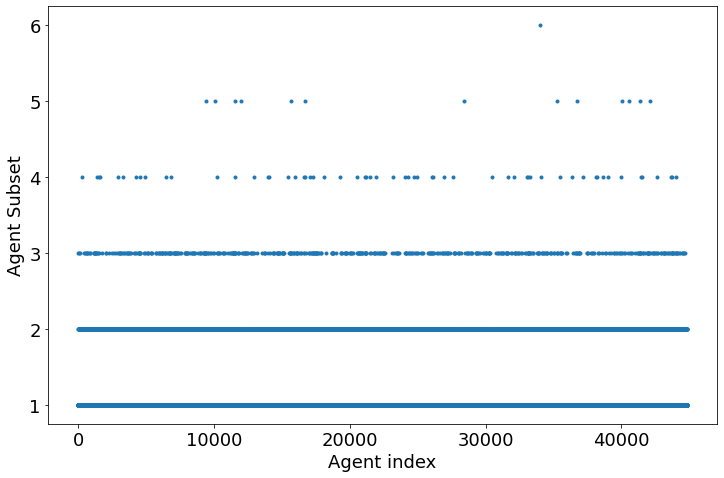

In [17]:
fig = plt.figure(figsize=(12,8))
#fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
#ax.set_title('axes title')

ax.set_xlabel('Agent index')
ax.set_ylabel('Agent Subset')
ax.plot(Data_agent['Agent_subset'].values, '.')

In [18]:
Data_agent[Data_agent['Agent_subset'] == Data_agent['Agent_subset'].max()]

,Node_id,Receipt_time,Height,Region_id,is_Agent,Agent_subset,Leaves,Links,Leaves_list,is_Leave
37947,37947,21629,6,14,True,6,6,14,"[1838, 11197, 30378, 34992, 31734, 46600]",0


In [19]:
len(Data_agent[Data_agent['is_Leave'] == 1])

25357

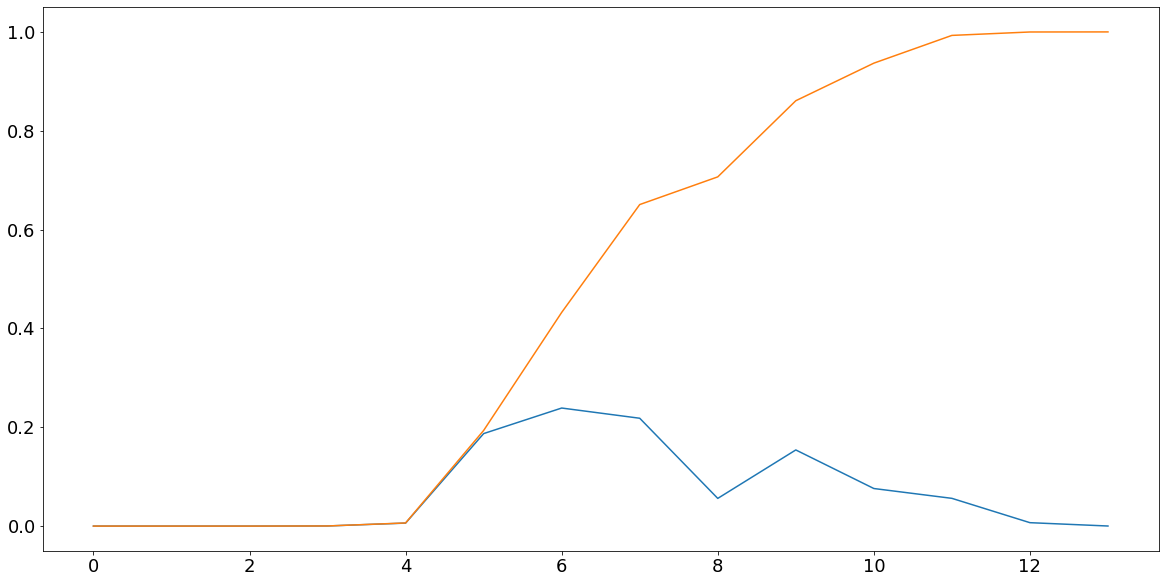

In [20]:
leaves_overheight = np.array(Data.groupby(['Height'])['is_Leave'].sum())
leaves_overheight_cum = np.cumsum(leaves_overheight)
plt.figure(figsize=(20,10))
plt.plot(leaves_overheight/sum(leaves_overheight))
plt.plot(np.array(leaves_overheight_cum)/sum(leaves_overheight))

(array([6.0000e+00, 5.3000e+01, 4.5700e+02, 3.3470e+03, 1.1203e+04,
        1.6170e+04, 3.5740e+03, 5.6090e+03, 2.7980e+03, 1.6120e+03]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

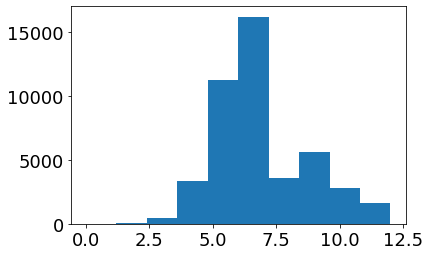

In [21]:
plt.hist(Data_agent['Height'])

In [22]:
len(Data_agent[Data_agent['Height'] < 6]['Agent_subset'])

15066